In [2]:
import pandas as pd
import numpy as py

df = pd.read_csv('tsla.csv')
df['date'] = pd.to_datetime(df['date'])
df['TSLA_volume'] = df['TSLA_volume'] * 10000000
df

,date,TSLA_volume,mean,std,abs_sentiment_score,news_count,is_option_expiry,is_first_trading_day,is_last_trading_day,is_last_trading_day_of_quarter,Friday,Monday,Thursday,Tuesday,Wednesday
0,2024-01-02,36427280.0,0.249787,0.360836,0.315842,31,0,1,0,0,0,0,0,1,0
1,2024-01-03,40913390.0,0.118213,0.346186,0.230460,30,0,0,0,0,0,0,0,0,1
2,2024-01-04,31465260.0,0.238166,0.455237,0.386341,16,0,0,0,0,0,0,1,0,0
3,2024-01-05,30252931.0,-0.068738,0.229072,0.149590,22,0,0,0,0,1,0,0,0,0
4,2024-01-08,25738913.0,0.178594,0.402761,0.347576,19,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2024-12-23,25287333.0,0.104530,0.542806,0.456627,24,0,0,0,0,0,1,0,0,0
247,2024-12-24,24164695.0,0.424831,0.375457,0.435469,13,0,0,0,0,0,0,0,1,0
248,2024-12-26,28068141.0,0.463436,0.303080,0.463436,8,0,0,0,0,0,0,1,0,0
249,2024-12-27,27887011.0,0.115828,0.518913,0.355225,8,0,0,0,0,1,0,0,0,0


In [3]:
# Create volume lag variables
for lag in range(1, 6):  # 1-day to 5-day lags
    df[f'TSLA_volume_lag_{lag}d'] = df['TSLA_volume'].shift(lag)

df

,date,TSLA_volume,mean,std,abs_sentiment_score,news_count,is_option_expiry,is_first_trading_day,is_last_trading_day,is_last_trading_day_of_quarter,Friday,Monday,Thursday,Tuesday,Wednesday,TSLA_volume_lag_1d,TSLA_volume_lag_2d,TSLA_volume_lag_3d,TSLA_volume_lag_4d,TSLA_volume_lag_5d
0,2024-01-02,36427280.0,0.249787,0.360836,0.315842,31,0,1,0,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN
1,2024-01-03,40913390.0,0.118213,0.346186,0.230460,30,0,0,0,0,0,0,0,0,1,36427280.0,NaN,NaN,NaN,NaN
2,2024-01-04,31465260.0,0.238166,0.455237,0.386341,16,0,0,0,0,0,0,1,0,0,40913390.0,36427280.0,NaN,NaN,NaN
3,2024-01-05,30252931.0,-0.068738,0.229072,0.149590,22,0,0,0,0,1,0,0,0,0,31465260.0,40913390.0,36427280.0,NaN,NaN
4,2024-01-08,25738913.0,0.178594,0.402761,0.347576,19,0,0,0,0,0,1,0,0,0,30252931.0,31465260.0,40913390.0,36427280.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2024-12-23,25287333.0,0.104530,0.542806,0.456627,24,0,0,0,0,0,1,0,0,0,38459637.0,36683349.0,29685114.0,48299703.0,32720825.0
247,2024-12-24,24164695.0,0.424831,0.375457,0.435469,13,0,0,0,0,0,0,0,1,0,25287333.0,38459637.0,36683349.0,29685114.0,48299703.0
248,2024-12-26,28068141.0,0.463436,0.303080,0.463436,8,0,0,0,0,0,0,1,0,0,24164695.0,25287333.0,38459637.0,36683349.0,29685114.0
249,2024-12-27,27887011.0,0.115828,0.518913,0.355225,8,0,0,0,0,1,0,0,0,0,28068141.0,24164695.0,25287333.0,38459637.0,36683349.0


In [4]:
df_train = df[df['date'] <= '2024-09-30'].copy()
df_test = df[df['date'] >= '2024-10-01'].copy()

df_train = df_train.set_index('date')
df_test = df_test.set_index('date')

df_train

,TSLA_volume,mean,std,abs_sentiment_score,news_count,is_option_expiry,is_first_trading_day,is_last_trading_day,is_last_trading_day_of_quarter,Friday,Monday,Thursday,Tuesday,Wednesday,TSLA_volume_lag_1d,TSLA_volume_lag_2d,TSLA_volume_lag_3d,TSLA_volume_lag_4d,TSLA_volume_lag_5d
date,,,,,,,,,,,,,,,,,,,
2024-01-02,36427280.0,0.249787,0.360836,0.315842,31,0,1,0,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN
2024-01-03,40913390.0,0.118213,0.346186,0.230460,30,0,0,0,0,0,0,0,0,1,36427280.0,NaN,NaN,NaN,NaN
2024-01-04,31465260.0,0.238166,0.455237,0.386341,16,0,0,0,0,0,0,1,0,0,40913390.0,36427280.0,NaN,NaN,NaN
2024-01-05,30252931.0,-0.068738,0.229072,0.149590,22,0,0,0,0,1,0,0,0,0,31465260.0,40913390.0,36427280.0,NaN,NaN
2024-01-08,25738913.0,0.178594,0.402761,0.347576,19,0,0,0,0,0,1,0,0,0,30252931.0,31465260.0,40913390.0,36427280.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-24,36532474.0,0.104597,0.272342,0.189851,13,0,0,0,0,0,0,0,1,0,27832749.0,29619455.0,30542461.0,17294703.0,25871621.0
2024-09-25,22972264.0,0.053433,0.100369,0.080284,4,0,0,0,0,0,0,0,0,1,36532474.0,27832749.0,29619455.0,30542461.0,17294703.0
2024-09-26,23097654.0,-0.064413,0.248177,0.186991,8,0,0,0,0,0,0,1,0,0,22972264.0,36532474.0,27832749.0,29619455.0,30542461.0


In [5]:
df_train.isnull().sum()

TSLA_volume                       0
mean                              0
std                               0
abs_sentiment_score               0
news_count                        0
is_option_expiry                  0
is_first_trading_day              0
is_last_trading_day               0
is_last_trading_day_of_quarter    0
Friday                            0
Monday                            0
Thursday                          0
Tuesday                           0
Wednesday                         0
TSLA_volume_lag_1d                1
TSLA_volume_lag_2d                2
TSLA_volume_lag_3d                3
TSLA_volume_lag_4d                4
TSLA_volume_lag_5d                5
dtype: int64

In [6]:
df_test.isnull().sum()

TSLA_volume                       0
mean                              0
std                               0
abs_sentiment_score               0
news_count                        0
is_option_expiry                  0
is_first_trading_day              0
is_last_trading_day               0
is_last_trading_day_of_quarter    0
Friday                            0
Monday                            0
Thursday                          0
Tuesday                           0
Wednesday                         0
TSLA_volume_lag_1d                0
TSLA_volume_lag_2d                0
TSLA_volume_lag_3d                0
TSLA_volume_lag_4d                0
TSLA_volume_lag_5d                0
dtype: int64

In [7]:
# Select the columns to standardize
cols_to_standardize = ['TSLA_volume', 'mean', 'std', 'abs_sentiment_score', 'news_count', 'TSLA_volume_lag_1d',
                      'TSLA_volume_lag_2d', 'TSLA_volume_lag_3d', 'TSLA_volume_lag_4d', 'TSLA_volume_lag_5d']

# Calculate mean and std from df_train
train_mean = df_train[cols_to_standardize].mean()
train_std = df_train[cols_to_standardize].std()

# Standardize df_train
df_train[cols_to_standardize] = (df_train[cols_to_standardize] - train_mean) / train_std

# Apply the same transformation to df_test using train's mean and std
df_test[cols_to_standardize] = (df_test[cols_to_standardize] - train_mean) / train_std

# Fill NaN values with column mean
df_train.fillna(df_train.mean(), inplace=True)
df_test

,TSLA_volume,mean,std,abs_sentiment_score,news_count,is_option_expiry,is_first_trading_day,is_last_trading_day,is_last_trading_day_of_quarter,Friday,Monday,Thursday,Tuesday,Wednesday,TSLA_volume_lag_1d,TSLA_volume_lag_2d,TSLA_volume_lag_3d,TSLA_volume_lag_4d,TSLA_volume_lag_5d
date,,,,,,,,,,,,,,,,,,,
2024-10-01,-0.438509,1.471704,1.104543,1.372463,-0.688814,0,1,0,0,0,0,0,1,0,-0.432613,-0.974727,-0.674267,-0.688652,0.571248
2024-10-02,0.796770,-0.387220,0.186277,-0.393578,0.269588,0,0,0,0,0,0,0,0,1,-0.439855,-0.437762,-0.976908,-0.677021,-0.684275
2024-10-03,-0.825646,-0.865253,-0.912416,-0.752918,0.044082,0,0,0,0,0,0,1,0,0,0.792733,-0.445003,-0.440738,-0.979227,-0.672665
2024-10-04,-0.261801,-1.800864,-0.159685,-0.090135,-0.632438,0,0,0,0,1,0,0,0,0,-0.826149,0.787403,-0.447969,-0.443827,-0.974313
2024-10-07,-0.991281,1.569156,1.513144,2.099093,-0.576061,0,0,0,0,0,1,0,0,0,-0.263531,-0.831239,0.782611,-0.451047,-0.439903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,-0.461488,0.617379,2.381238,2.458523,0.156835,0,0,0,0,0,1,0,0,0,0.762836,0.592260,-0.062334,1.660725,0.218332
2024-12-24,-0.566172,3.230237,0.489182,2.185345,-0.463308,0,0,0,0,0,0,0,1,0,-0.462784,0.757510,0.587757,-0.065967,1.660762
2024-12-26,-0.202182,3.545157,-0.329118,2.546443,-0.745191,0,0,0,0,0,0,1,0,0,-0.567240,-0.467928,0.752763,0.583190,-0.062740


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (Y)
X_train = df_train.drop(columns=['TSLA_volume'])  # Drop target variable from features
Y_train = df_train['TSLA_volume']  # Target variable

X_test = df_test.drop(columns=['TSLA_volume'])  # Drop target variable from features
Y_test = df_test['TSLA_volume']  # Target variable

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print model evaluation results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Print the intercept
print(f"Intercept: {model.intercept_:.4f}")

# Display model coefficients
coef_df = pd.DataFrame({"Feature": X_train.columns, "Coefficient": model.coef_})
coef_df

Mean Squared Error (MSE): 1.1254
R-squared (R²): 0.3818
Intercept: 0.0246


,Feature,Coefficient
0,mean,0.026981
1,std,-0.206861
2,abs_sentiment_score,0.247961
3,news_count,0.557281
4,is_option_expiry,0.146634
5,is_first_trading_day,-0.357957
6,is_last_trading_day,-0.763301
7,is_last_trading_day_of_quarter,1.225221
8,Friday,-0.131342
9,Monday,-0.066377


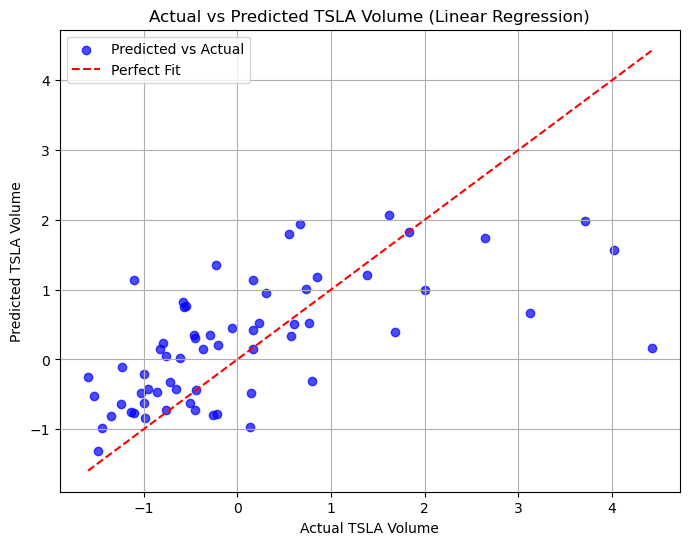

In [9]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.7, label="Predicted vs Actual", color="blue")
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle="--", color="red", label="Perfect Fit")

# Labels and title
plt.xlabel("Actual TSLA Volume")
plt.ylabel("Predicted TSLA Volume")
plt.title("Actual vs Predicted TSLA Volume (Linear Regression)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

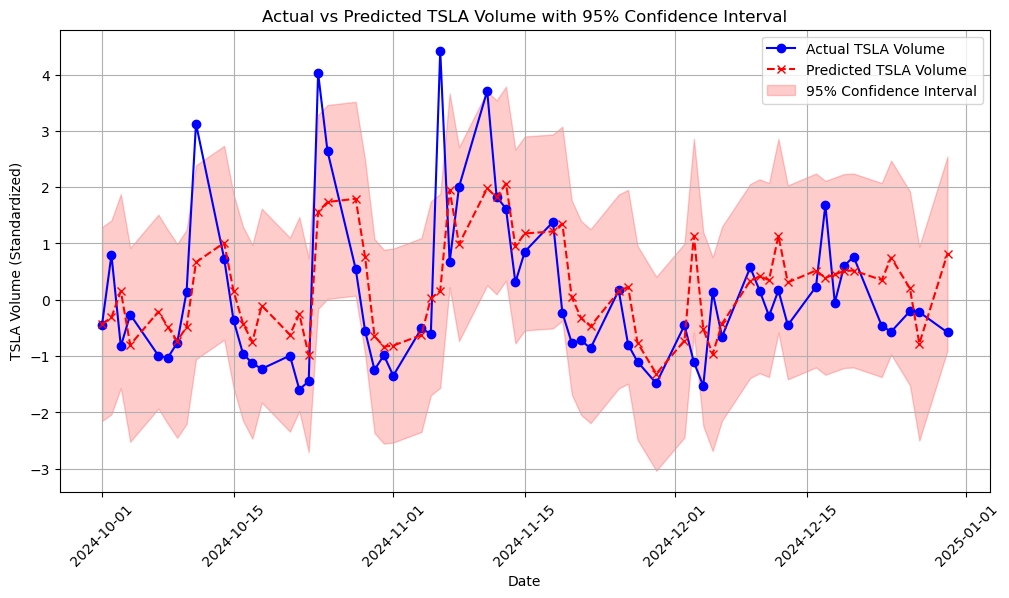

In [10]:
import numpy as np

# Compute standard deviation of residuals (errors)
residuals = Y_test - Y_pred
std_dev = np.std(residuals)

# Define confidence interval (90% CI ~ 1.645 * std deviation)
ci_upper = Y_pred + 1.645 * std_dev
ci_lower = Y_pred - 1.645 * std_dev

# Plot actual vs predicted with confidence interval
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, Y_test, label="Actual TSLA Volume", marker="o", linestyle="-", color="blue")
plt.plot(df_test.index, Y_pred, label="Predicted TSLA Volume", marker="x", linestyle="--", color="red")
plt.fill_between(df_test.index, ci_lower, ci_upper, color="red", alpha=0.2, label="95% Confidence Interval")

# Labels and title
plt.xlabel("Date")
plt.ylabel("TSLA Volume (Standardized)")
plt.title("Actual vs Predicted TSLA Volume with 95% Confidence Interval")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()

In [11]:
import statsmodels.api as sm

# Add a constant (intercept) to the features for statsmodels
X_train_sm = sm.add_constant(X_train)

# Fit an OLS model using statsmodels to get p-values
ols_model = sm.OLS(Y_train, X_train_sm).fit()

# Extract p-values
p_values_df = pd.DataFrame({"Feature": X_train_sm.columns, "P-Value": ols_model.pvalues})
p_values_df

,Feature,P-Value
const,const,6.551672e-01
mean,mean,6.102654e-01
std,std,8.821516e-02
abs_sentiment_score,abs_sentiment_score,4.225056e-02
news_count,news_count,9.014234e-20
is_option_expiry,is_option_expiry,5.865049e-01
is_first_trading_day,is_first_trading_day,1.442367e-01
is_last_trading_day,is_last_trading_day,1.165555e-02
is_last_trading_day_of_quarter,is_last_trading_day_of_quarter,1.713947e-02
Friday,Friday,2.795407e-01
